In [187]:
import networkx as nx
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [188]:
p = '870323'
y = '2012'

In [189]:
G = nx.DiGraph()
 
with open(p + '_' + y + '.csv', 'r') as csvfile:

    csv_f = csv.reader(csvfile)
    csv_f.next()

    for row in csv_f:
        G.add_edge(row[0],row[1],weight=row[2]) 

In [194]:
oc = nx.out_degree_centrality(G)
nx.set_node_attributes(G, 'cent', oc)
node_color = [float(G.node[v]['cent']) for v in G]

totexp = {}
for exp in G.nodes(): 
    tx=sum([float(g) for exp,f,g in G.out_edges_iter(exp, 'weight')])
    totexp[exp] = tx
    avgexp = np.mean(tx) * 400
nx.set_node_attributes(G, 'totexp', totexp)
node_size = [float(G.node[v]['totexp']) / avgexp for v in G]

In [191]:
np.std(tx)

0.0

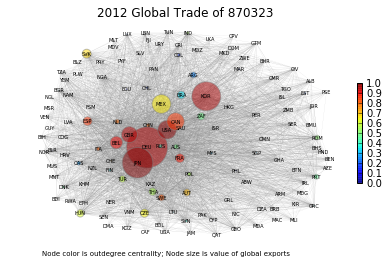

In [203]:
pos = nx.spring_layout(G,k=120,iterations=10) 
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, node_color=node_color, \
                               alpha=0.5) 
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', \
                               arrows=False, width=0.05,)
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')
plt.text(0,-0.1, \
         'Node color is outdegree centrality; Node size is value of global exports', \
         fontsize=7)
plt.title(y + ' Global Trade of ' + p, fontsize=12)
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)
plt.margins(0,0)
plt.axis('off')
plt.savefig(p + '.png', dpi=1000)

In [193]:
#G.node['USA']['totexp']
print float(sum(d[] for d in tx)) / len(tx)

SyntaxError: invalid syntax (<ipython-input-193-fee58184c959>, line 2)

In [ ]:
avgexp * 100